In [1]:
import numpy as np
import pandas as pd

In [3]:
np.random.seed(42)

In [5]:
employee_ids=[f"EMP_{i:03d}"for i in range(1,31)]
dates=pd.date_range("2025-07-01",periods=30,freq="D")

In [7]:
dates

DatetimeIndex(['2025-07-01', '2025-07-02', '2025-07-03', '2025-07-04',
               '2025-07-05', '2025-07-06', '2025-07-07', '2025-07-08',
               '2025-07-09', '2025-07-10', '2025-07-11', '2025-07-12',
               '2025-07-13', '2025-07-14', '2025-07-15', '2025-07-16',
               '2025-07-17', '2025-07-18', '2025-07-19', '2025-07-20',
               '2025-07-21', '2025-07-22', '2025-07-23', '2025-07-24',
               '2025-07-25', '2025-07-26', '2025-07-27', '2025-07-28',
               '2025-07-29', '2025-07-30'],
              dtype='datetime64[ns]', freq='D')

In [13]:
data={
    "Date":np.tile(dates,len(employee_ids)),
    "Employee_ID":np.repeat(employee_ids,len(dates)),
    "Working_Hours":np.random.uniform(4,10,size=len(dates)*len(employee_ids)).round(2)
}
data

{'Date': array(['2025-07-01T00:00:00.000000000', '2025-07-02T00:00:00.000000000',
        '2025-07-03T00:00:00.000000000', '2025-07-04T00:00:00.000000000',
        '2025-07-05T00:00:00.000000000', '2025-07-06T00:00:00.000000000',
        '2025-07-07T00:00:00.000000000', '2025-07-08T00:00:00.000000000',
        '2025-07-09T00:00:00.000000000', '2025-07-10T00:00:00.000000000',
        '2025-07-11T00:00:00.000000000', '2025-07-12T00:00:00.000000000',
        '2025-07-13T00:00:00.000000000', '2025-07-14T00:00:00.000000000',
        '2025-07-15T00:00:00.000000000', '2025-07-16T00:00:00.000000000',
        '2025-07-17T00:00:00.000000000', '2025-07-18T00:00:00.000000000',
        '2025-07-19T00:00:00.000000000', '2025-07-20T00:00:00.000000000',
        '2025-07-21T00:00:00.000000000', '2025-07-22T00:00:00.000000000',
        '2025-07-23T00:00:00.000000000', '2025-07-24T00:00:00.000000000',
        '2025-07-25T00:00:00.000000000', '2025-07-26T00:00:00.000000000',
        '2025-07-27T00:00:00.0

In [17]:
df=pd.DataFrame(data)
df

,Date,Employee_ID,Working_Hours
0,2025-07-01,EMP_001,5.25
1,2025-07-02,EMP_001,4.16
2,2025-07-03,EMP_001,5.09
3,2025-07-04,EMP_001,7.50
4,2025-07-05,EMP_001,6.53
...,...,...,...
895,2025-07-26,EMP_030,4.51
896,2025-07-27,EMP_030,8.30
897,2025-07-28,EMP_030,4.43
898,2025-07-29,EMP_030,4.43


In [19]:
df.to_csv("employee_working_hours.csv",index=False)

In [23]:
df_csv=pd.read_csv("employee_working_hours.csv")
df

,Date,Employee_ID,Working_Hours
0,2025-07-01,EMP_001,5.25
1,2025-07-02,EMP_001,4.16
2,2025-07-03,EMP_001,5.09
3,2025-07-04,EMP_001,7.50
4,2025-07-05,EMP_001,6.53
...,...,...,...
895,2025-07-26,EMP_030,4.51
896,2025-07-27,EMP_030,8.30
897,2025-07-28,EMP_030,4.43
898,2025-07-29,EMP_030,4.43


In [25]:
row=df.iloc[2]
row

Date             2025-07-03 00:00:00
Employee_ID                  EMP_001
Working_Hours                   5.09
Name: 2, dtype: object

In [27]:
print(df_csv.head())
print(df_csv.describe())
print(df_csv["Employee_ID"].nunique())


         Date Employee_ID  Working_Hours
0  2025-07-01     EMP_001           5.25
1  2025-07-02     EMP_001           4.16
2  2025-07-03     EMP_001           5.09
3  2025-07-04     EMP_001           7.50
4  2025-07-05     EMP_001           6.53
       Working_Hours
count     900.000000
mean        7.016256
std         1.757421
min         4.030000
25%         5.430000
50%         7.075000
75%         8.532500
max        10.000000
30


In [31]:
total_hours=df_csv.groupby("Employee_ID")["Working_Hours"].sum().sort_values(ascending=False)
total_hours

Employee_ID
EMP_019    228.20
EMP_009    225.66
EMP_016    221.83
EMP_010    221.31
EMP_004    221.15
EMP_007    217.55
EMP_025    217.23
EMP_006    217.19
EMP_022    213.58
EMP_026    213.11
EMP_005    211.76
EMP_015    211.67
EMP_012    211.24
EMP_014    210.30
EMP_020    210.02
EMP_030    209.53
EMP_008    209.32
EMP_011    208.98
EMP_027    208.69
EMP_017    207.67
EMP_001    206.03
EMP_023    205.81
EMP_002    205.31
EMP_024    205.29
EMP_021    205.07
EMP_029    201.92
EMP_003    199.83
EMP_018    199.63
EMP_028    199.00
EMP_013    190.75
Name: Working_Hours, dtype: float64

In [35]:
avg_daily=df_csv.groupby("Employee_ID")["Working_Hours"].mean()
avg_daily

Employee_ID
EMP_001    6.867667
EMP_002    6.843667
EMP_003    6.661000
EMP_004    7.371667
EMP_005    7.058667
EMP_006    7.239667
EMP_007    7.251667
EMP_008    6.977333
EMP_009    7.522000
EMP_010    7.377000
EMP_011    6.966000
EMP_012    7.041333
EMP_013    6.358333
EMP_014    7.010000
EMP_015    7.055667
EMP_016    7.394333
EMP_017    6.922333
EMP_018    6.654333
EMP_019    7.606667
EMP_020    7.000667
EMP_021    6.835667
EMP_022    7.119333
EMP_023    6.860333
EMP_024    6.843000
EMP_025    7.241000
EMP_026    7.103667
EMP_027    6.956333
EMP_028    6.633333
EMP_029    6.730667
EMP_030    6.984333
Name: Working_Hours, dtype: float64

In [41]:
threshold_low=5
threshold_high=9

In [43]:
threshold_high

9

In [63]:
df_csv["Low_Hour_Flag"]=df_csv["Working_Hours"]<threshold_low
df_csv["High_Hour_Flag"]=df_csv["Working_Hours"]>threshold_high
df_csv

,Date,Employee_ID,Working_Hours,Low_Hour_Flag,High_Hour_Flag
0,2025-07-01,EMP_001,5.25,False,False
1,2025-07-02,EMP_001,4.16,True,False
2,2025-07-03,EMP_001,5.09,False,False
3,2025-07-04,EMP_001,7.50,False,False
4,2025-07-05,EMP_001,6.53,False,False
...,...,...,...,...,...
895,2025-07-26,EMP_030,4.51,True,False
896,2025-07-27,EMP_030,8.30,False,False
897,2025-07-28,EMP_030,4.43,True,False
898,2025-07-29,EMP_030,4.43,True,False


In [59]:
print(df_csv[df_csv["Low_Hour_Flag"]|
df_csv["High_Hour_Flag"].head()])

           Date Employee_ID  Working_Hours  Low_Hour_Flag  High_Hour_Flag
0    2025-07-01     EMP_001           5.25          False            True
1    2025-07-02     EMP_001           4.16           True            True
2    2025-07-03     EMP_001           5.09          False            True
3    2025-07-04     EMP_001           7.50          False            True
4    2025-07-05     EMP_001           6.53          False            True
..          ...         ...            ...            ...             ...
894  2025-07-25     EMP_030           4.25           True            True
895  2025-07-26     EMP_030           4.51           True            True
897  2025-07-28     EMP_030           4.43           True            True
898  2025-07-29     EMP_030           4.43           True            True
899  2025-07-30     EMP_030           4.07           True            True

[159 rows x 5 columns]


In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

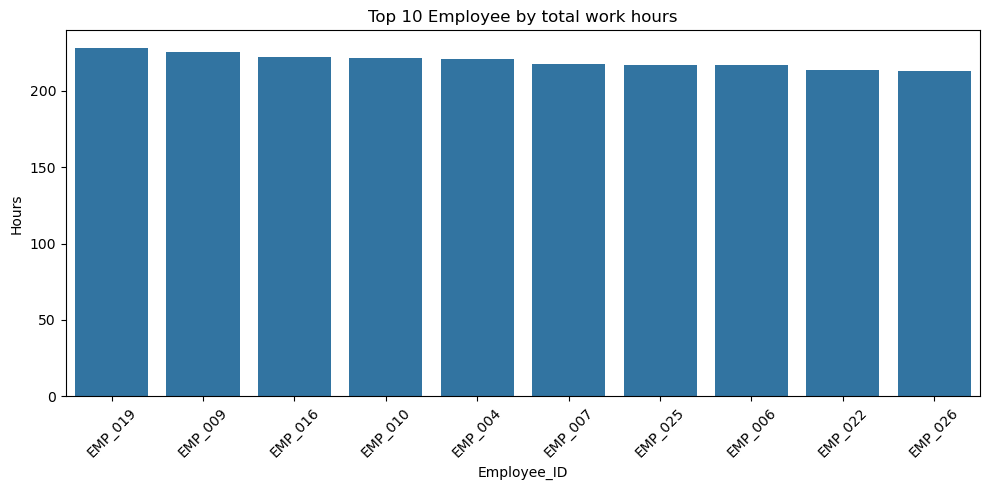

In [69]:
top10=total_hours.head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top10.index,y=top10.values)
plt.xticks(rotation=45)
plt.title("Top 10 Employee by total work hours")
plt.ylabel("Hours")
plt.tight_layout()
plt.show()